# Competitive Project: Attempt Two

In the last attempt, we learned that a logistic regression technique yielded
a 5% higher accuracy score on training data, and a 10% higher score on the test
data in Kaggle.

The focus of Attempt Two will be to preprocess the data so that we can throw the
whole set at a wider array of SKLearn models.

In [8]:
# Import necessary libraries for analysis
import numpy as np 
import pandas as pd

In [9]:
# Import both datasets
train_df = pd.read_csv("../data/train_final.csv")
test_df =  pd.read_csv("../data/test_final.csv")

# Separate features and targets from training data
feats = train_df[train_df.columns[:-1]]
targs = train_df[train_df.columns[-1]]

tst_feats = test_df[feats.columns]

train_df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income>50K
0,53,Self-emp-not-inc,93449,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,1
1,33,Self-emp-not-inc,123424,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
2,47,Private,144844,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
3,40,Private,114580,HS-grad,9,Divorced,Craft-repair,Other-relative,White,Female,0,0,40,Vietnam,0
4,39,Private,115618,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,50,United-States,0


We'll start by evaluating distributions of all variables.

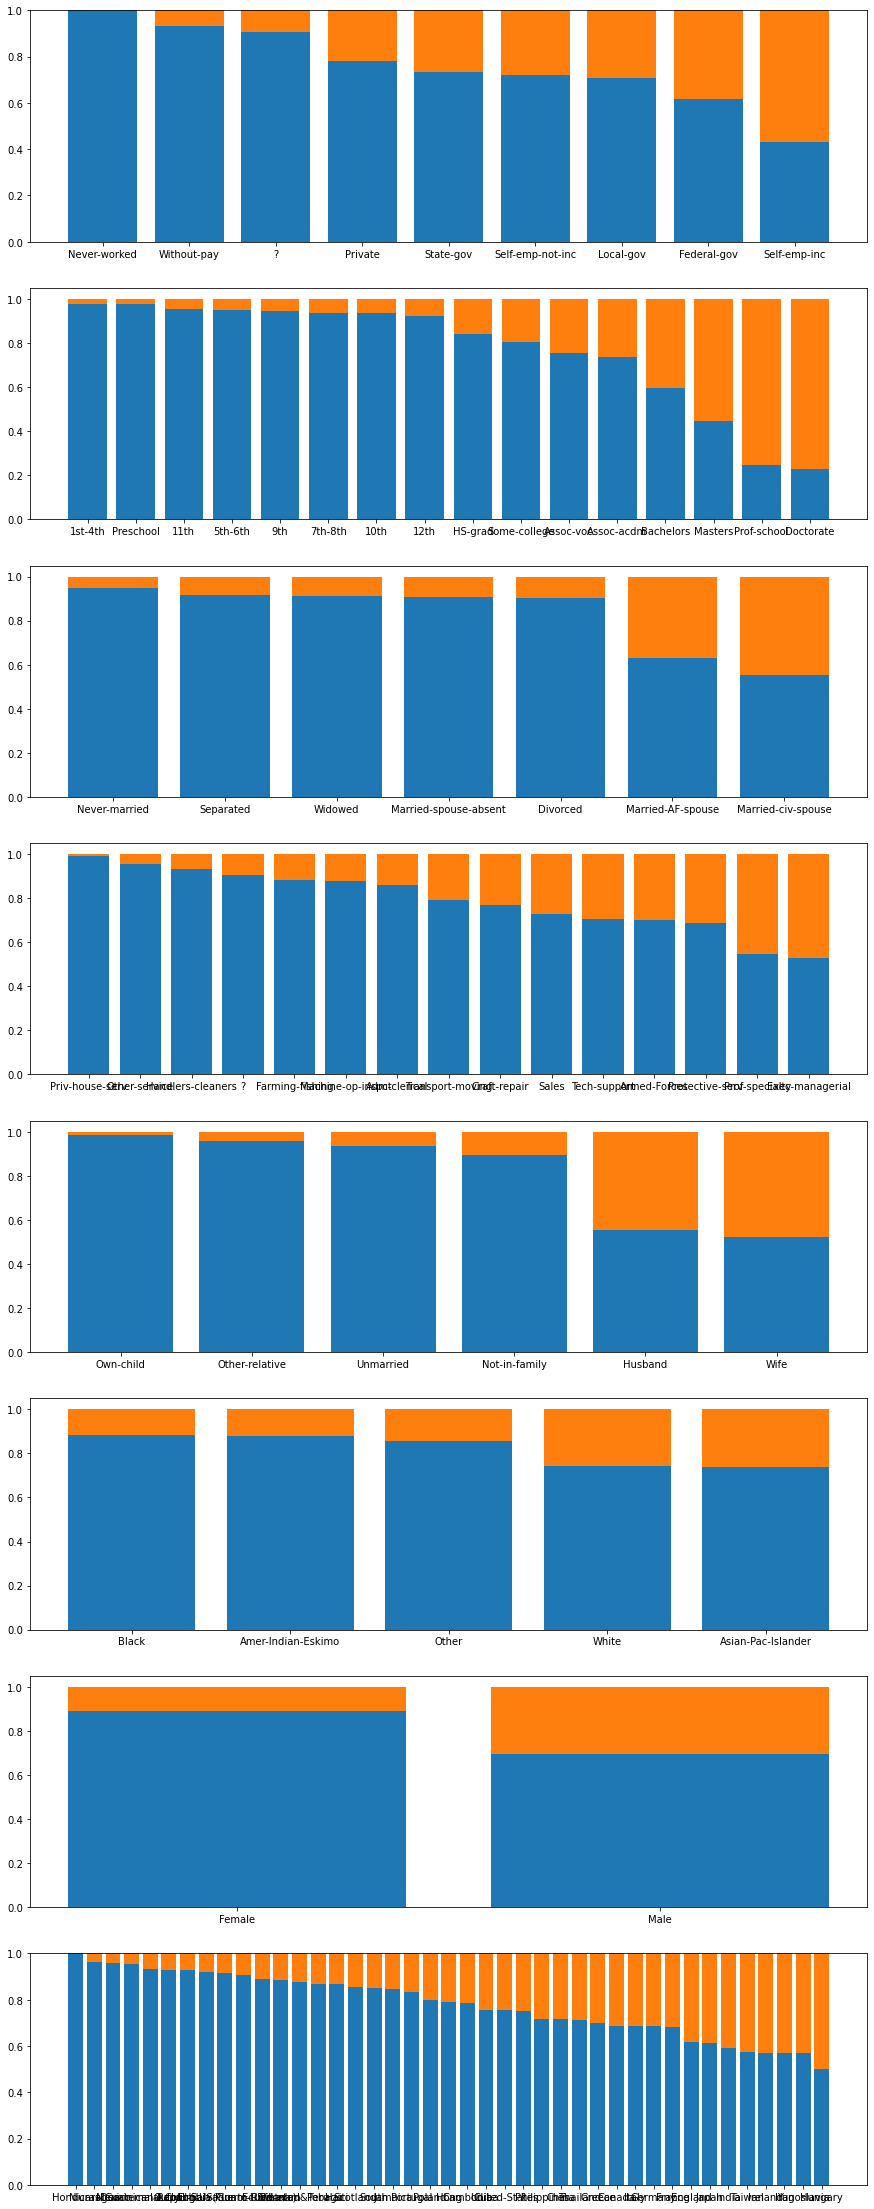

In [45]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Pick out the continuous or integer variables
ovars = []
for c in feats.columns:
    if feats[c].dtype in ["object"]:
        ovars.append(c)

fig: plt.Figure = plt.figure(figsize=(15, len(ovars) * 5))
gs = GridSpec(nrows=len(ovars), ncols=1)

for i, v in enumerate(ovars):

    data = train_df[[v, "income>50K"]]
    grp  = data.groupby(by=v)
    labeled = grp.sum() / grp.count()
    labeled.sort_values(by="income>50K", inplace=True)
    labeled["income<50K"] = 1 - labeled["income>50K"]
    labeled["pct"] = grp.count() / len(train_df)

    ax = fig.add_subplot(gs[i, 0])
    ax.bar(labeled.index, labeled["income<50K"])
    ax.bar(labeled.index, labeled["income>50K"], bottom=labeled["income<50K"])

In [ ]:
from sklearn.linear_model import LogisticRegression

In [12]:
# Save the model, and output to a csv
model = 0

out = pd.DataFrame(model.predict(tst_feats[cont_vars]), columns = ["Prediction"])
out.set_index(test_df["ID"], inplace=True)

out.to_csv("attempt01.csv")

AttributeError: 'int' object has no attribute 'predict'